importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score

reading and preprocessing csv file from null values if there was any

In [ ]:
dp = pd.read_csv('/content/sentiment.csv')

dp.fillna('none', inplace=True)
dp.to_csv("clean_data.csv", index=False)
dp.describe()

,sentiment
count,5000.00000
mean,0.50000
std,0.50005
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


dividing data into training and testing 20% for testing 80% for training

In [ ]:
X = dp['review']
Y = dp['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 0)

make a histogram of the data

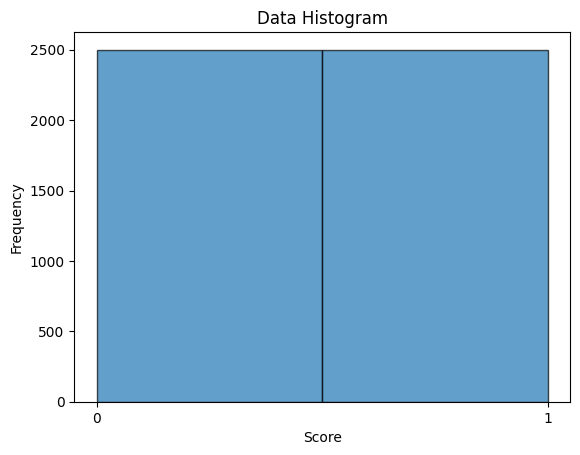

In [ ]:
plt.hist(Y, bins=2, edgecolor='black',alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Data Histogram')
plt.xticks([0, 1])
plt.show()

vectorizing data into numbers and fitting the naive bayes multinomial model

In [ ]:
vectorizer = CountVectorizer()

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

y_pred = classifier.predict(X_test_features)

evaluation metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1-score: ", f1)

Accuracy:  0.809
Precision:  0.8103098677821164
F1-score:  0.8086581759155564


hyperparameter tuning the model

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 2.5, 3.0, 3.5]
}
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 5, scoring ='accuracy')
grid_search.fit(X_train_features, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'alpha': 2.0}
Best Accuracy Score:  0.82025


applying the best hyperparameter

In [ ]:
classifier = MultinomialNB(alpha = 2.0)
classifier.fit(X_train_features, y_train)

y_pred = classifier.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1-score: ", f1)

Accuracy:  0.815
Precision:  0.8168935254181156
F1-score:  0.8145662457323845


testing the model for positivity

In [ ]:
new_text = ['I am satisfied by this product it cleans the pc very well, I recommend everyone with a pc to buy this']
X_new = vectorizer.transform(new_text)
y_pred = classifier.predict(X_new)

sentiment_labels = {0: "negative", 1: "positive"}
sentiment = sentiment_labels[y_pred[0]]

print(sentiment)

positive


testing the model for negativity

In [ ]:
new_text = ['if I knew this product was this bad i wouldnt even think of buying it']
X_new = vectorizer.transform(new_text)
y_pred = classifier.predict(X_new)

sentiment_labels = {0: "negative", 1: "positive"}
sentiment = sentiment_labels[y_pred[0]]

print(sentiment)

negative
